## Problem Statement

### Business Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


### Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or deniedied or deniedRatio = 1

## Importing necessary libraries

In [1636]:
# Installing the libraries with the specified version.

#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
#!pip install --upgrade -q threadpoolctl

#To install xgboost library use - !pip install xgboost
!pip install xgboost
!pip install imblearn --user
!pip install imbalanced-learn --user

In [1637]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import math

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [1639]:
import os
path = os.getcwd() + '\\EasyVisa.csv'
visa_data = pd.read_csv(path)

In [1640]:
# copying data to another variable to avoid any changes to original data
df_temp = visa_data.copy()

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [1644]:
# Checking the number of rows and columns in the training data
df_temp.shape

(25480, 12)

### Displaying the first few rows of the dataset

In [1646]:
# let's view the first 5 rows of the data
df_temp.head().T

,0,1,2,3,4
case_id,EZYV01,EZYV02,EZYV03,EZYV04,EZYV05
continent,Asia,Asia,Asia,Asia,Africa
education_of_employee,High School,Master's,Bachelor's,Bachelor's,Master's
has_job_experience,N,Y,N,N,Y
requires_job_training,N,N,Y,N,N
no_of_employees,14513,2412,44444,98,1082
yr_of_estab,2007,2002,2008,1897,2005
region_of_employment,West,Northeast,West,West,South
prevailing_wage,592.203,83425.650,122996.860,83434.030,149907.390
unit_of_wage,Hour,Year,Year,Year,Year


In [1647]:
# let's view the last 5 rows of the data
df_temp.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


### Checking the data types of the columns for the dataset

In [1649]:
# let's check the data types of the columns in the dataset
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [1650]:
# Deriving Company Age from Year of Establishment & Categorizing it in Bins
df_temp['company_age'] = 2016-df_temp['yr_of_estab']
#create bins to categorize companies by the number of years since the company was founded
bins = [0,1966,1986,1996,2006,np.Inf]
names = ['50+','30-50','20-30','10-20','0-10']
df_temp['company_age'] = pd.cut(df_temp['yr_of_estab'], bins, labels=names)
df_temp['company_age'].value_counts()

company_age
10-20    8378
50+      5109
0-10     4856
30-50    3746
20-30    3391
Name: count, dtype: int64

In [1651]:
# Since Prevailing Wage depends upon unit of wage, we first need to standardize this column by converting each column to hourly-wages  

# To create hourly wages from yearly, monthly & weekly, it is assumed that:
# A year includes 2072 work-hours
# A month includes 171 work-hours
# A week includes 38 work-hours

df_temp["hourly_wage"] = df_temp["prevailing_wage"]
df_temp.loc[df_temp.unit_of_wage == "Year", "hourly_wage"] = (
    df_temp.loc[df_temp.unit_of_wage == "Year", "hourly_wage"] / 2072.0
)
df_temp.loc[df_temp.unit_of_wage == "Month", "hourly_wage"] = (
    df_temp.loc[df_temp.unit_of_wage == "Month", "hourly_wage"] / 171.0
)
df_temp.loc[df_temp.unit_of_wage == "Week", "hourly_wage"] = (
    df_temp.loc[df_temp.unit_of_wage == "Week", "hourly_wage"] / 40.0
)
df_temp[['unit_of_wage', 'hourly_wage']].sample(5)

,unit_of_wage,hourly_wage
2231,Year,35.172
15088,Year,43.675
1061,Year,28.558
21336,Year,43.800
12485,Year,30.289


In [1652]:
#Check for any negative values in the no of employees & if present replace by median
print('Negative Values in Employee Field =',df_temp[df_temp.no_of_employees<0].shape[0])
#Replacing negative values with median
median_emp = df_temp['no_of_employees'].median()
df_temp.no_of_employees = np.where(df_temp.no_of_employees<0, median_emp, df_temp.no_of_employees)
print('Negative Values in Employee Field after Treatment =',df_temp[df_temp.no_of_employees<0].shape[0])

#create bins to categorize companies by the size of their overall workforce
bins = [0,1000,2000,3000,4000,np.Inf]
names = ['0-1000','1000-2000','2000-3000','3000-4000','4000+']
df_temp['company_size'] = pd.cut(df_temp['no_of_employees'], bins, labels=names)
df_temp['company_size'].value_counts()

Negative Values in Employee Field = 33
Negative Values in Employee Field after Treatment = 0


company_size
0-1000       6208
1000-2000    5915
2000-3000    5011
4000+        4798
3000-4000    3548
Name: count, dtype: int64

### Checking for duplicate values

In [1654]:
# let's check for duplicate values in the data
print('Duplicated Values: ',df_temp.duplicated().sum())

Duplicated Values:  0


### Checking for missing values

In [1656]:
# let's check for missing values in the data
print('Missing Values:-\n')
df_temp.isnull().sum()

Missing Values:-



case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
company_age              0
hourly_wage              0
company_size             0
dtype: int64

In [1657]:
#Dropping redundant variables - case_id, no_of_employees, yr_of_estab, prevailing_wage
#lets create a copy of dataset before dropping columns
df = df_temp.copy()
col_drop = ['case_id','no_of_employees','yr_of_estab','prevailing_wage']
df.drop(col_drop, axis=1, inplace=True)

# Convert all object type to categorical
obj_col = list(df.select_dtypes("object").columns)
for i in obj_col:
    df[i] = pd.Categorical(df[i])

In [1658]:
#Checking datatypes again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   region_of_employment   25480 non-null  category
 5   unit_of_wage           25480 non-null  category
 6   full_time_position     25480 non-null  category
 7   case_status            25480 non-null  category
 8   company_age            25480 non-null  category
 9   hourly_wage            25480 non-null  float64 
 10  company_size           25480 non-null  category
dtypes: category(10), float64(1)
memory usage: 449.7 KB


### Statistical summary of the dataset

In [1660]:
# let's view the statistical summary of the numerical columns in the data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
case_status,25480,2,Certified,17018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_age,25480,5,10-20,8378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hourly_wage,25480.000,NaN,NaN,NaN,95.060,278.205,0.048,22.736,39.979,60.244,7004.399


In [1661]:
for i in df.describe(include=["category"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
Unique values in region_of_employment are :
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
*******

In [1662]:
# list of categorical & numerical columns
cat_col = list(df.select_dtypes("category").columns)
cat_num = list(df.select_dtypes("float64").columns)
print('Categorical Variables: ',cat_col)
print('\nNumerical Variables: ',cat_num)

Categorical Variables:  ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status', 'company_age', 'company_size']

Numerical Variables:  ['hourly_wage']


## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [1665]:
    # function to plot a boxplot and a histogram along the same scale.
    
    
    def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
        """
        Boxplot and histogram combined
    
        data: dataframe
        feature: dataframe column
        figsize: size of figure (default (12,7))
        kde: whether to the show density curve (default False)
        bins: number of bins for histogram (default None)
        """
        f2, (ax_box2, ax_hist2) = plt.subplots(
            nrows=2,  # Number of rows of the subplot grid= 2
            sharex=True,  # x-axis will be shared among all subplots
            gridspec_kw={"height_ratios": (0.25, 0.75)},
            figsize=figsize,
        )  # creating the 2 subplots
        sns.boxplot(
            data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
        )  # boxplot will be created and a triangle will indicate the mean value of the column
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        ) if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )  # For histogram
        ax_hist2.axvline(
            data[feature].mean(), color="green", linestyle="--"
        )  # Add mean to the histogram
        ax_hist2.axvline(
            data[feature].median(), color="black", linestyle="-"
        )  # Add median to the histogram

In [1666]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [1667]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [1668]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Univariate Analysis - Categorical`

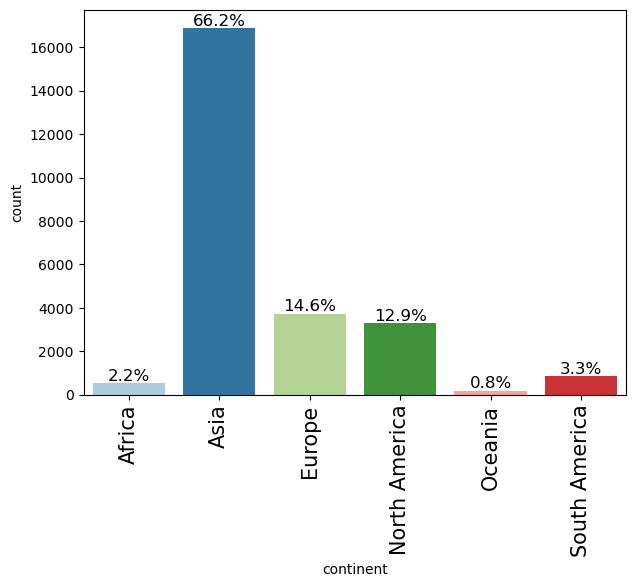

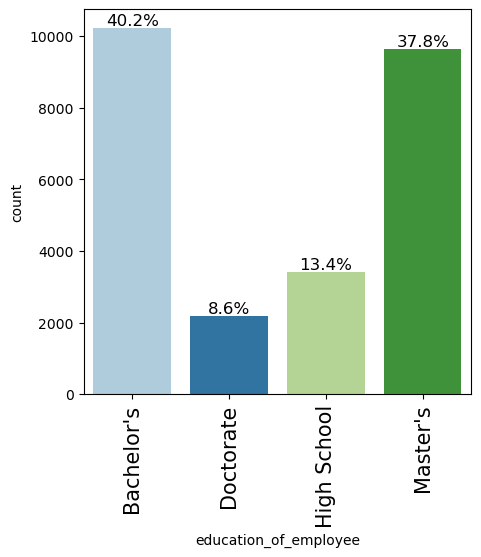

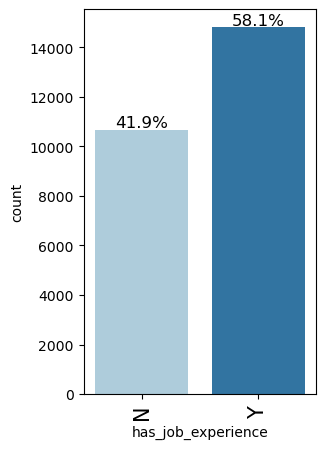

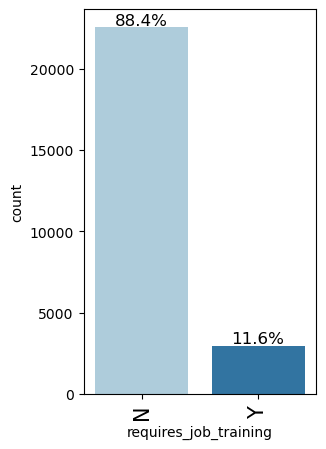

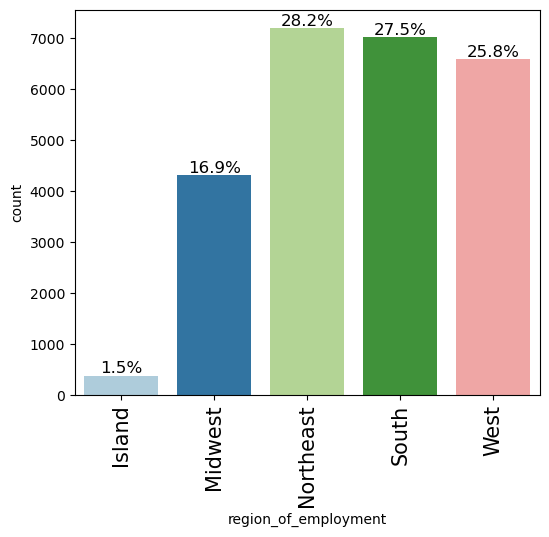

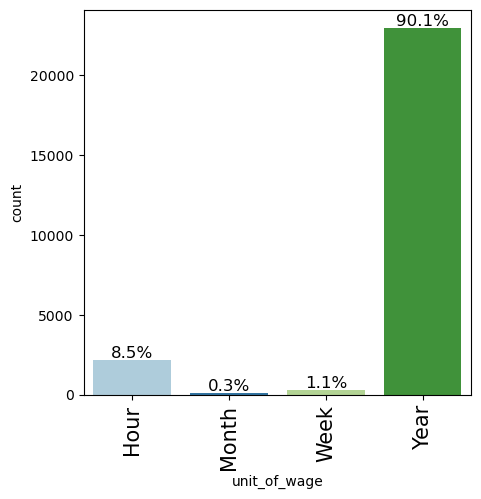

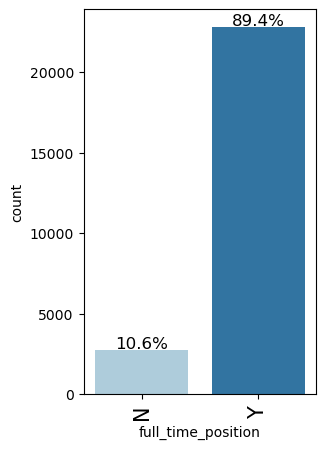

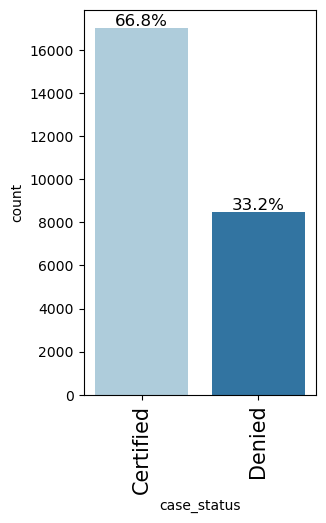

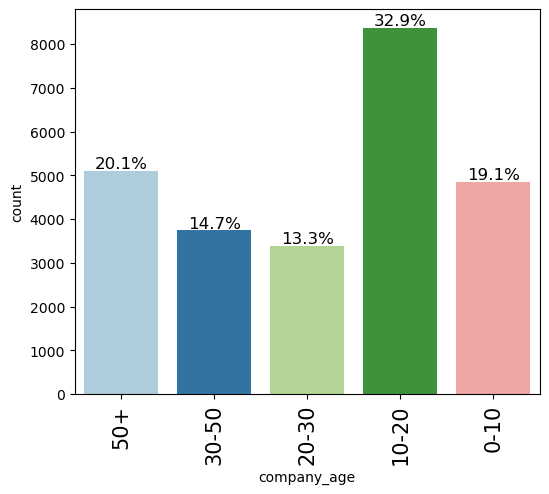

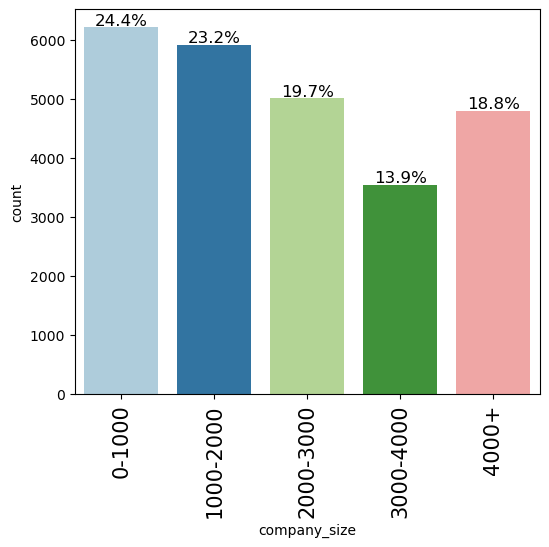

In [1671]:
for i in cat_col:
 labeled_barplot(data=df, feature=i, perc=True, n=None)

`Univariate Analysis - Numerical`

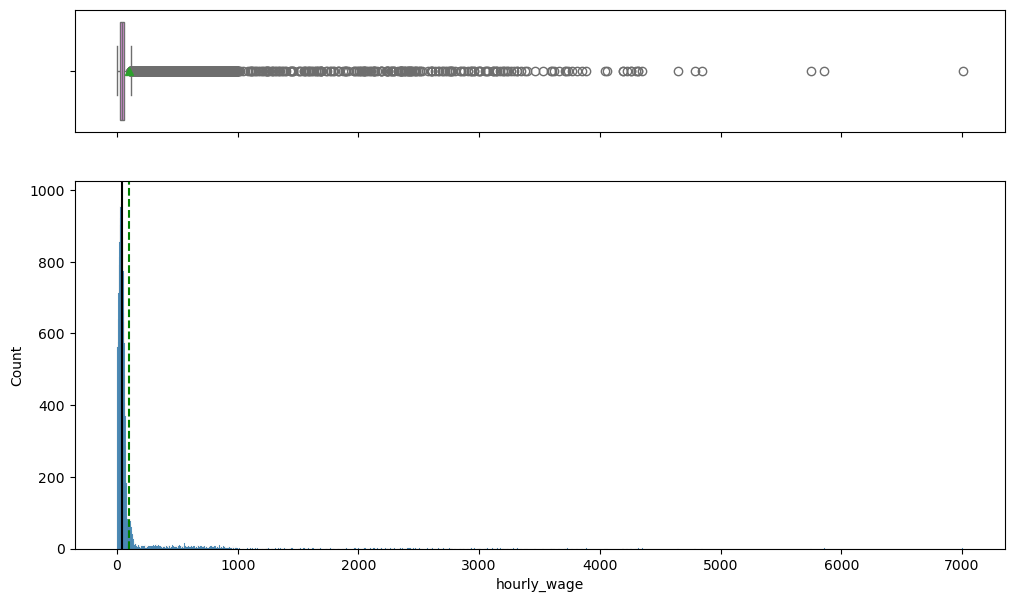

In [1673]:
histogram_boxplot(data=df, feature='hourly_wage', figsize=(12, 7), kde=False, bins=None)

### Bivariate Distributions

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


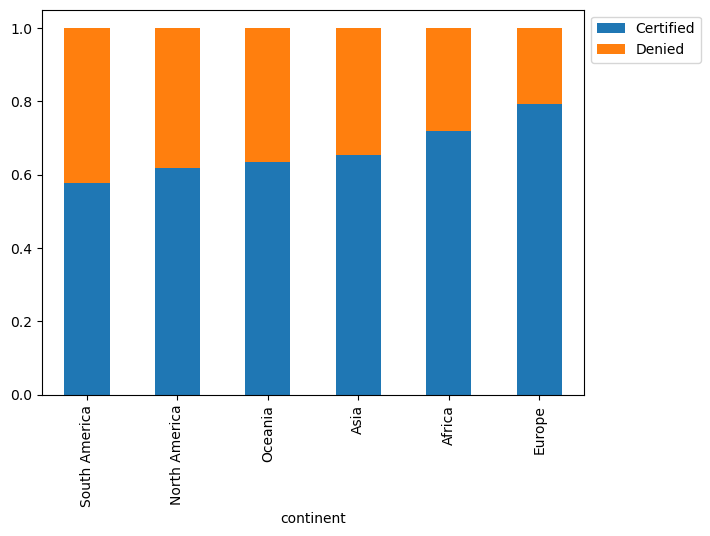

************************************************************************************************************************
case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


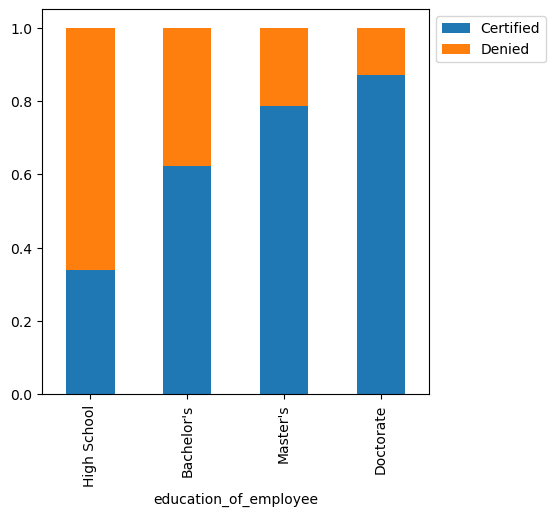

************************************************************************************************************************
case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


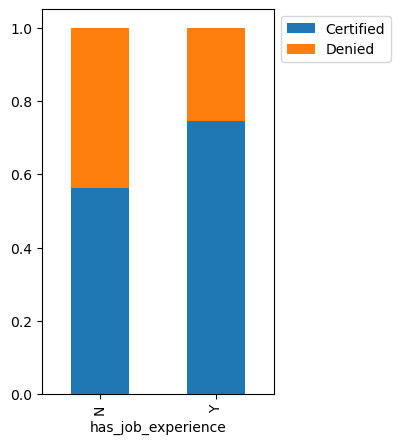

************************************************************************************************************************
case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


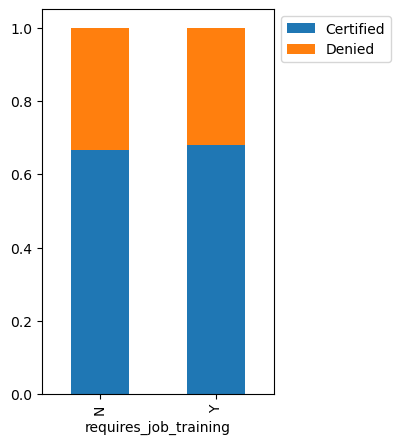

************************************************************************************************************************
case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


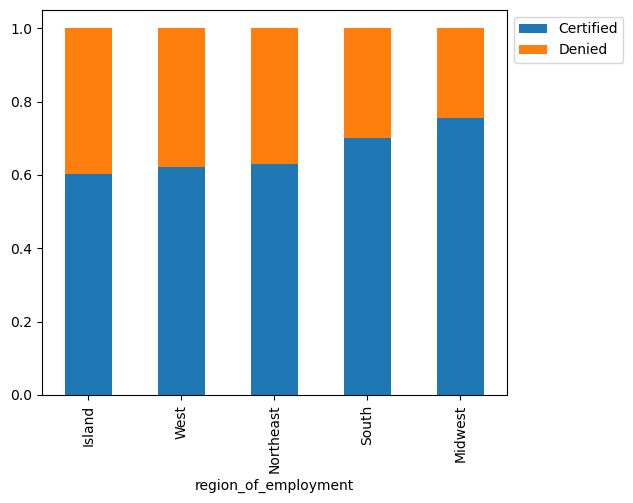

************************************************************************************************************************
case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


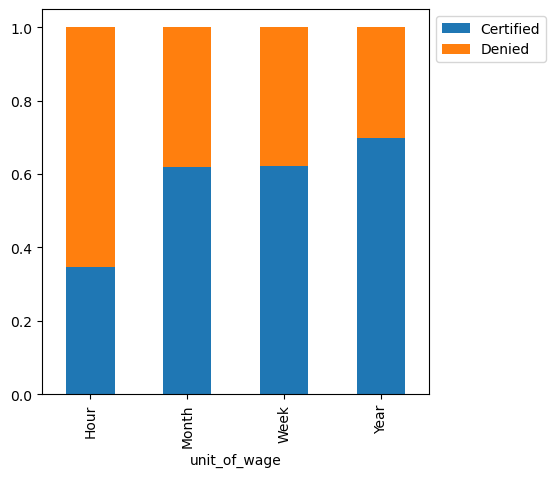

************************************************************************************************************************
case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


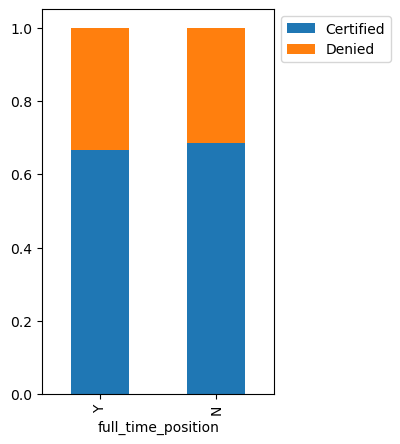

************************************************************************************************************************
case_status  Certified  Denied    All
case_status                          
Denied               0    8462   8462
All              17018    8462  25480
Certified        17018       0  17018
------------------------------------------------------------------------------------------------------------------------


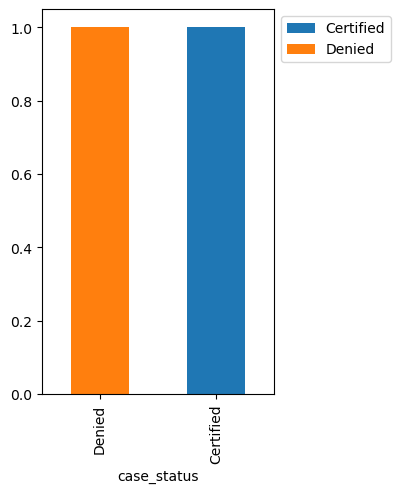

************************************************************************************************************************
case_status  Certified  Denied    All
company_age                          
All              17018    8462  25480
10-20             5573    2805   8378
50+               3387    1722   5109
0-10              3359    1497   4856
30-50             2469    1277   3746
20-30             2230    1161   3391
------------------------------------------------------------------------------------------------------------------------


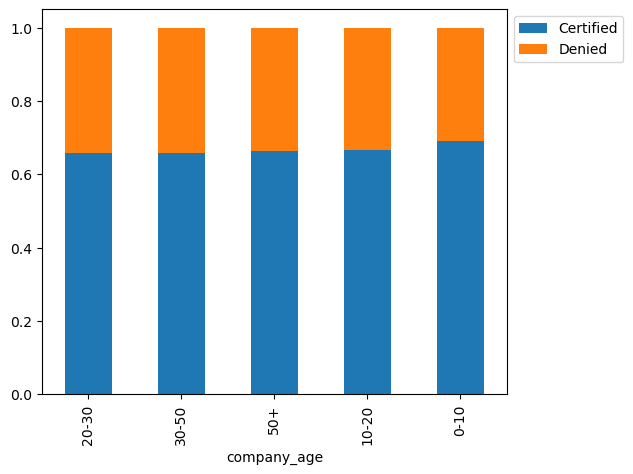

************************************************************************************************************************
case_status   Certified  Denied    All
company_size                          
All               17018    8462  25480
0-1000             4091    2117   6208
1000-2000          3878    2037   5915
2000-3000          3347    1664   5011
4000+              3361    1437   4798
3000-4000          2341    1207   3548
------------------------------------------------------------------------------------------------------------------------


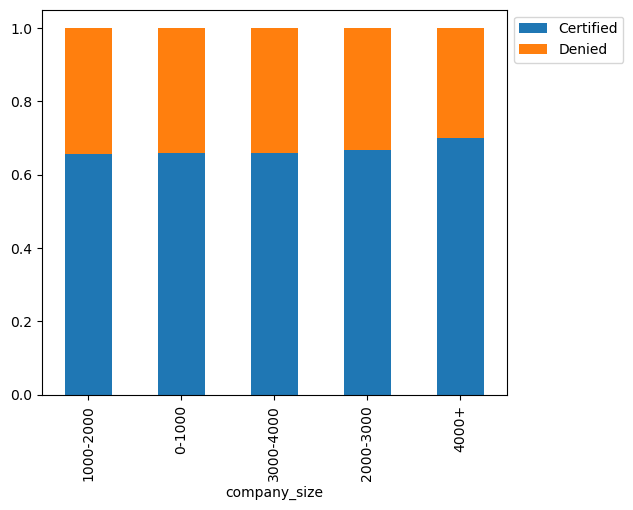

************************************************************************************************************************


In [1675]:
for i in cat_col:
    stacked_barplot(df, i, "case_status")
    print('************************************************************************************************************************')

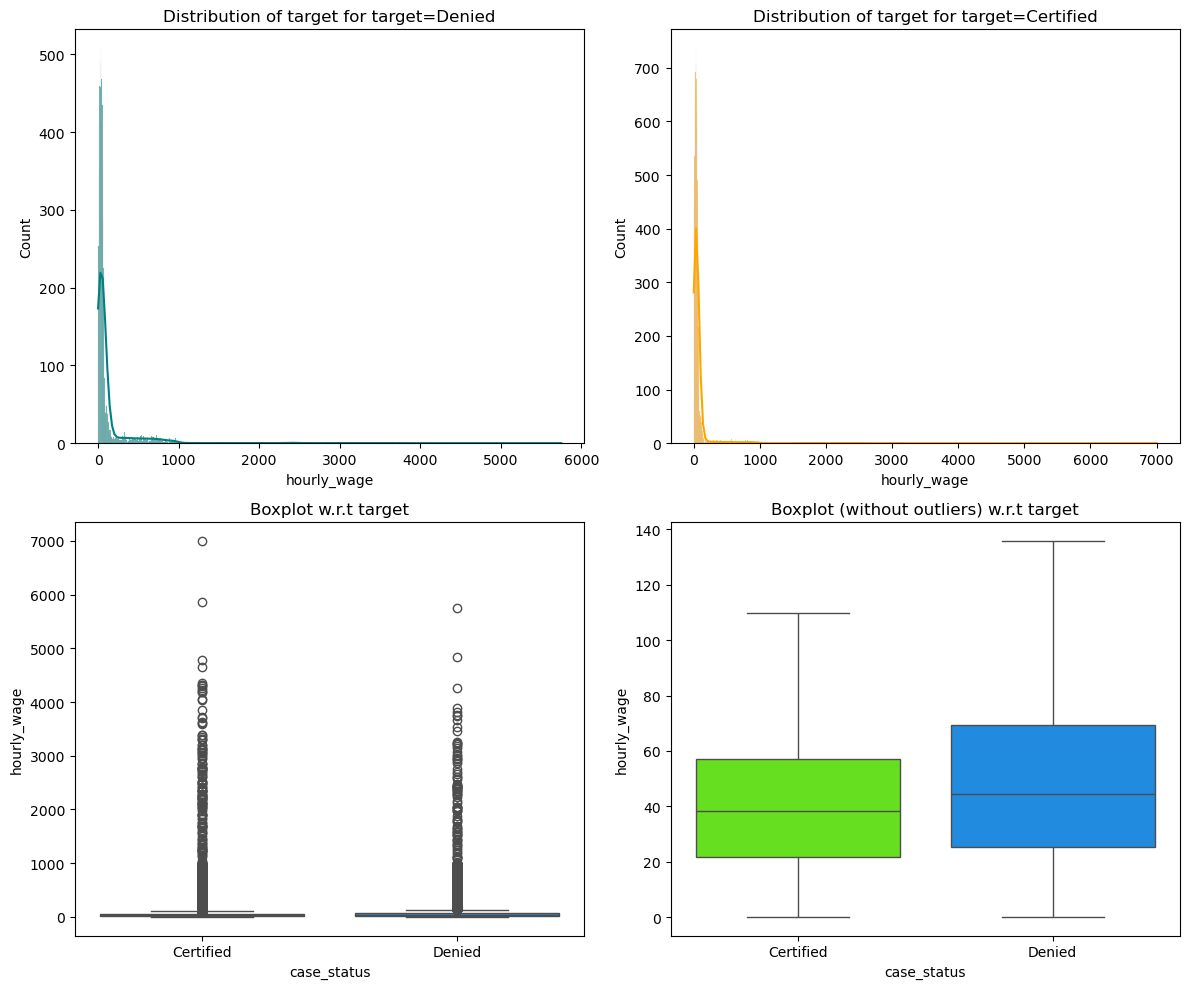

In [1676]:
distribution_plot_wrt_target(df, predictor='hourly_wage', target='case_status')

## Data Preprocessing

### Outlier Detection

Text(0, 0.5, 'Hourly Wage in $')

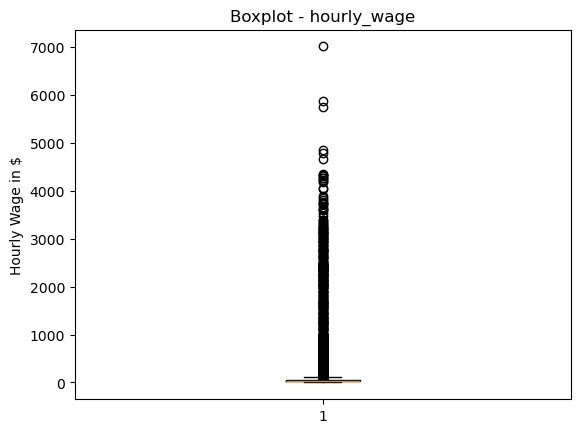

In [1679]:
# Boxtplot of hourly_wage
plt.boxplot(df['hourly_wage'], whis=1.5)
plt.title('Boxplot - hourly_wage')
plt.ylabel("Hourly Wage in $")

In [1680]:
# Define function to get Upper & Lower Whiskers of boxplot
def Whiskers(c):
    sorted(c)
    Q1,Q3 = np.percentile(c,[25,75])
    LW = Q1 - (Q3-Q1)*1.5
    UW = Q3 + (Q3-Q1)*1.5
    return LW,UW

In [1681]:
# hourly_wage: Calculate Outlier Count & Percentage
L_Whis,U_Whis = Whiskers(df['hourly_wage'])
UW_count = df[df['hourly_wage']>U_Whis].shape[0]
LW_count = df[df['hourly_wage']<L_Whis].shape[0]
Outlier_count = LW_count + UW_count
Col_count = df['hourly_wage'].shape[0]
Outlier_Percentage = (Outlier_count/Col_count)*100
print('Lower Wishker at',L_Whis,'| Upper Whisker at',U_Whis)
print('Lower Whisker Outlier Count =',LW_count)
print('Upper Whisker Outlier Count =',UW_count)
print('Total Outlier Count=',Outlier_count)
print('Outlier Percentage in hourly_wage=',Outlier_Percentage,'%')

# Even though the Outlier count is high, we choose not to treat the outliers to avoid any loss if information

Lower Wishker at -33.526853281853285 | Upper Whisker at 116.5061003861004
Lower Whisker Outlier Count = 0
Upper Whisker Outlier Count = 2385
Total Outlier Count= 2385
Outlier Percentage in hourly_wage= 9.36028257456829 %


### Label Encoding

In [1683]:
# Encoding Certified and Denied cases to 1 and 0 respectively, for analysis.
df["case_status"].replace("Certified", 1, inplace=True)
df["case_status"].replace("Denied", 0, inplace=True)
df["case_status"].value_counts()

case_status
1    17018
0     8462
Name: count, dtype: int64

### Train-Test Split

In [1685]:
# creating the copy of the dataframe
data = df.copy()

In [1686]:
# Dividing train data into X and y

X = data.drop(["case_status"], axis=1)
y = data["case_status"]

In [1687]:
# Splitting data into training and validation set:

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print('Train dataset shape: ',X_train.shape,'\nValidation dataset shape: ', X_val.shape,'\nTest dataset shape: ', X_test.shape)
print("\nPercentage of classes in Train dataset: ",y_train.value_counts(normalize=True))
print("\nPercentage of classes in Validation dataset: ",y_val.value_counts(normalize=True))
print("\nPercentage of classes in Test dataset: ",y_test.value_counts(normalize=True))

Train dataset shape:  (15288, 10) 
Validation dataset shape:  (5096, 10) 
Test dataset shape:  (5096, 10)

Percentage of classes in Train dataset:  case_status
1   0.668
0   0.332
Name: proportion, dtype: float64

Percentage of classes in Validation dataset:  case_status
1   0.668
0   0.332
Name: proportion, dtype: float64

Percentage of classes in Test dataset:  case_status
1   0.668
0   0.332
Name: proportion, dtype: float64


### Missing value check

In [1689]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
company_age              0
hourly_wage              0
company_size             0
dtype: int64
------------------------------
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
company_age              0
hourly_wage              0
company_size             0
dtype: int64
------------------------------
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
region_of_employment     0
unit_of_wage             0
full_time_position       0
company_age              0
hourly_wage              0
company_size             0
dtype: int64


In [1690]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************
company_age
10-20    5026
50+      2996
0-1

In [1691]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************
company_age
10-20    1654
50+      1050
0-10      978
30-

In [1692]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************
company_age
10-20    1698
50+      1063
0-10      919
30-

### Encoding categorical variables

In [1694]:
X_train = pd.get_dummies(X_train, dtype=int, drop_first=True)
X_val = pd.get_dummies(X_val, dtype=int, drop_first=True)
X_test = pd.get_dummies(X_test, dtype=int, drop_first=True)
print('Train dataset shape post encoding: ',
      X_train.shape,'\nValidation dataset shape post encoding: ', 
      X_val.shape,'\nTest dataset shape post encoding: ', 
      X_test.shape
     )

Train dataset shape post encoding:  (15288, 27) 
Validation dataset shape post encoding:  (5096, 27) 
Test dataset shape post encoding:  (5096, 27)


In [1695]:
# check the top 5 rows from the train dataset
X_train = X_train.astype(float)
X_train.head().T

,5008,12951,3214,18876,21939
hourly_wage,34.228,28.515,10.732,9.140,31.808
continent_Asia,1.000,0.000,1.000,0.000,1.000
continent_Europe,0.000,1.000,0.000,1.000,0.000
continent_North America,0.000,0.000,0.000,0.000,0.000
continent_Oceania,0.000,0.000,0.000,0.000,0.000
continent_South America,0.000,0.000,0.000,0.000,0.000
education_of_employee_Doctorate,0.000,0.000,0.000,0.000,0.000
education_of_employee_High School,0.000,0.000,0.000,0.000,0.000
education_of_employee_Master's,0.000,1.000,0.000,0.000,0.000
has_job_experience_Y,1.000,1.000,0.000,0.000,0.000


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Prediction of visa certification while the visa will actually be denied, i.e., false positive.
- Prediction of visa denial while the visa will actually be certified, i.e., false negative.

Which case is more important?

- A false positive would lead to the waste of the OFLC's time and staff resources, while a false negative would prevent a qualified applicant who could fill essential jobs in the United States from receiving work visa. Therefore, it appears that both errors could be equally important for the OFLC to be minimized.

**How to reduce this loss i.e need to reduce False Negatives??**

- To minimize both the false positive and false negative errors simultaneously, it is decided that F1-score could be the optimal performance measure for the models built subsequently. That is, the best model would maximize F1-score, while it would not be overfitting or underfitting the training data.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [1700]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [1701]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [1703]:
# Empty list to store all the models for comparison
model_comp = pd.DataFrame({"Model":[],"Training F1-Score":[],"Validation F1-Score":[],"Difference":[]})

In [1704]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree | Original", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging | Original", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest | Original", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("Adaboost | Original", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost| Original", GradientBoostingClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    print("{} | F1 score - {}".format(name, round(scores_train,3)))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{} | F1 score - {}".format(name, round(scores_val,3)))

print("\nTraining and Validation Performance Difference:\n")
for name, model in models:
    model.fit(X_train, y_train)
    f1_train = f1_score(y_train, model.predict(X_train))
    f1_val = f1_score(y_val, model.predict(X_val))
    diff = f1_train - f1_val
    print("{} | Training F1 Score: {:.3f}, Validation F1 Score: {:.3f}, Difference: {:.3f}".format(name, f1_train, f1_val, diff))
    model_temp = pd.DataFrame({"Model":[name],"Training F1-Score":[f1_train],"Validation F1-Score":[f1_val],"Difference":[diff]})
    model_comp = pd.concat([model_comp,model_temp])


Training Performance:

Decision tree | Original | F1 score - 1.0
Bagging | Original | F1 score - 0.987
Random forest | Original | F1 score - 1.0
Adaboost | Original | F1 score - 0.819
Gradient Boost| Original | F1 score - 0.828

Validation Performance:

Decision tree | Original | F1 score - 0.741
Bagging | Original | F1 score - 0.774
Random forest | Original | F1 score - 0.775
Adaboost | Original | F1 score - 0.816
Gradient Boost| Original | F1 score - 0.826

Training and Validation Performance Difference:

Decision tree | Original | Training F1 Score: 1.000, Validation F1 Score: 0.741, Difference: 0.259
Bagging | Original | Training F1 Score: 0.987, Validation F1 Score: 0.774, Difference: 0.214
Random forest | Original | Training F1 Score: 1.000, Validation F1 Score: 0.775, Difference: 0.225
Adaboost | Original | Training F1 Score: 0.819, Validation F1 Score: 0.816, Difference: 0.003
Gradient Boost| Original | Training F1 Score: 0.828, Validation F1 Score: 0.826, Difference: 0.002


### Model Building - Oversampled Data

In [1706]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 27)
After Oversampling, the shape of train_y: (20420,) 



In [1707]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree | Oversampled", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging | Oversampled", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest | Oversampled", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("Adaboost | Oversampled", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost | Oversampled", GradientBoostingClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    print("{} | F1 score - {}".format(name, round(scores_train,3)))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{} | F1 score - {}".format(name, round(scores_val,3)))

print("\nTraining and Validation Performance Difference:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    f1_train = f1_score(y_train_over, model.predict(X_train_over))
    f1_val = f1_score(y_val, model.predict(X_val))
    diff = f1_train - f1_val
    print("{} | Training F1 Score: {:.3f}, Validation F1 Score: {:.3f}, Difference: {:.3f}".format(name, f1_train, f1_val, diff))
    model_temp = pd.DataFrame({"Model":[name],"Training F1-Score":[f1_train],"Validation F1-Score":[f1_val],"Difference":[diff]})
    model_comp = pd.concat([model_comp,model_temp])


Training Performance:

Decision tree | Oversampled | F1 score - 1.0
Bagging | Oversampled | F1 score - 0.986
Random forest | Oversampled | F1 score - 1.0
Adaboost | Oversampled | F1 score - 0.777
Gradient Boost | Oversampled | F1 score - 0.81

Validation Performance:

Decision tree | Oversampled | F1 score - 0.742
Bagging | Oversampled | F1 score - 0.763
Random forest | Oversampled | F1 score - 0.772
Adaboost | Oversampled | F1 score - 0.788
Gradient Boost | Oversampled | F1 score - 0.81

Training and Validation Performance Difference:

Decision tree | Oversampled | Training F1 Score: 1.000, Validation F1 Score: 0.742, Difference: 0.258
Bagging | Oversampled | Training F1 Score: 0.986, Validation F1 Score: 0.763, Difference: 0.223
Random forest | Oversampled | Training F1 Score: 1.000, Validation F1 Score: 0.772, Difference: 0.228
Adaboost | Oversampled | Training F1 Score: 0.777, Validation F1 Score: 0.788, Difference: -0.011
Gradient Boost | Oversampled | Training F1 Score: 0.810, V

### Model Building - Undersampled Data

In [1709]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [1710]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 27)
After Under Sampling, the shape of train_y: (10156,) 



In [1711]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision tree | Undersampled", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Bagging | Undersampled", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest | Undersampled", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("Adaboost | Undersampled", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost | Undersampled", GradientBoostingClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    print("{} | F1 score - {}".format(name, round(scores_train,3)))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{} | F1 score - {}".format(name, round(scores_val,3)))

print("\nTraining and Validation Performance Difference:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    f1_train = f1_score(y_train_un, model.predict(X_train_un))
    f1_val = f1_score(y_val, model.predict(X_val))
    diff = f1_train - f1_val
    print("{} | Training F1 Score: {:.3f}, Validation F1 Score: {:.3f}, Difference: {:.3f}".format(name, f1_train, f1_val, diff))
    model_temp = pd.DataFrame({"Model":[name],"Training F1-Score":[f1_train],"Validation F1-Score":[f1_val],"Difference":[diff]})
    model_comp = pd.concat([model_comp,model_temp])


Training Performance:

Decision tree | Undersampled | F1 score - 1.0
Bagging | Undersampled | F1 score - 0.976
Random forest | Undersampled | F1 score - 1.0
Adaboost | Undersampled | F1 score - 0.704
Gradient Boost | Undersampled | F1 score - 0.726

Validation Performance:

Decision tree | Undersampled | F1 score - 0.685
Bagging | Undersampled | F1 score - 0.693
Random forest | Undersampled | F1 score - 0.711
Adaboost | Undersampled | F1 score - 0.762
Gradient Boost | Undersampled | F1 score - 0.777

Training and Validation Performance Difference:

Decision tree | Undersampled | Training F1 Score: 1.000, Validation F1 Score: 0.685, Difference: 0.315
Bagging | Undersampled | Training F1 Score: 0.976, Validation F1 Score: 0.693, Difference: 0.283
Random forest | Undersampled | Training F1 Score: 1.000, Validation F1 Score: 0.711, Difference: 0.289
Adaboost | Undersampled | Training F1 Score: 0.704, Validation F1 Score: 0.762, Difference: -0.058
Gradient Boost | Undersampled | Training F

In [1712]:
#Table of Models - Original, Oversamples & Undersampled
model_comp

,Model,Training F1-Score,Validation F1-Score,Difference
0,Decision tree | Original,1.000,0.741,0.259
0,Bagging | Original,0.987,0.774,0.214
0,Random forest | Original,1.000,0.775,0.225
0,Adaboost | Original,0.819,0.816,0.003
0,Gradient Boost| Original,0.828,0.826,0.002
0,Decision tree | Oversampled,1.000,0.742,0.258
0,Bagging | Oversampled,0.986,0.763,0.223
0,Random forest | Oversampled,1.000,0.772,0.228
0,Adaboost | Oversampled,0.777,0.788,-0.011
0,Gradient Boost | Oversampled,0.810,0.810,-0.001


In [1713]:
# Average F1-Score Difference (Between Original, Oversampled & Undersampled Models) : Decision Tree
dtree_avg = (model_comp['Difference'].iloc[0] + model_comp['Difference'].iloc[5] + model_comp['Difference'].iloc[10])/3
print('Decision Tree | F1 Score Difference Average = ',round(dtree_avg,3))

# Average F1-Score Difference (Between Original, Oversampled & Undersampled Models) : Bagging
bag_avg = (model_comp['Difference'].iloc[1] + model_comp['Difference'].iloc[6] + model_comp['Difference'].iloc[11])/3
print('Bagging | F1 Score Difference Average = ',round(bag_avg,3))

# Average F1-Score Difference (Between Original, Oversampled & Undersampled Models) : Random forest
rf_avg = (model_comp['Difference'].iloc[2] + model_comp['Difference'].iloc[7] + model_comp['Difference'].iloc[12])/3
print('Random Forest | F1 Score Difference Average = ',round(rf_avg,3))

# Average F1-Score Difference (Between Original, Oversampled & Undersampled Models) : Adaboost
ada_avg = (abs(model_comp['Difference'].iloc[3]) + abs(model_comp['Difference'].iloc[8]) + abs(model_comp['Difference'].iloc[13]))/3
print('Adaboost | F1 Score Difference Average = ',round(ada_avg,3))

# Average F1-Score Difference (Between Original, Oversampled & Undersampled Models) : Gradient Boost
gb_avg = (abs(model_comp['Difference'].iloc[4]) + abs(model_comp['Difference'].iloc[9]) + abs(model_comp['Difference'].iloc[14]))/3
print('Gradient Boost | F1 Score Difference Average = ',round(gb_avg,3))

Decision Tree | F1 Score Difference Average =  0.277
Bagging | F1 Score Difference Average =  0.24
Random Forest | F1 Score Difference Average =  0.247
Adaboost | F1 Score Difference Average =  0.024
Gradient Boost | F1 Score Difference Average =  0.018


### Hyperparameter Tuning

#### Tuning AdaBoost using Original Data

In [1716]:
# defining model
Model_ada_og = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_ada_og, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8236220098886333:


In [1717]:
# Creating new pipeline with best parameters
tuned_adb_og = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb_og.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, random_state=1)

In [1718]:
# Checking model's performance on training set
adb_og_train = model_performance_classification_sklearn(tuned_adb_og, X_train, y_train)
print('Training Performance Metrics - Adaboost | Original Data')
adb_og_train

Training Performance Metrics - Adaboost | Original Data


,Accuracy,Recall,Precision,F1
0,0.753,0.874,0.782,0.825


In [1719]:
# Checking model's performance on validation set
adb_og_val = model_performance_classification_sklearn(tuned_adb_og, X_val, y_val)
print('Validation Performance Metrics - Adaboost | Original Data')
adb_og_val

Validation Performance Metrics - Adaboost | Original Data


,Accuracy,Recall,Precision,F1
0,0.753,0.868,0.785,0.825


#### Tuning Gradient Boosting using Original Data

In [1721]:
#Creating pipeline
Model_gb_og = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_gb_og, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8233454002701398:


In [1722]:
# Creating new pipeline with best parameters
tuned_gb_og = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gb_og.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5, random_state=1,
                           subsample=0.7)

In [1723]:
# Checking model's performance on training set
gb_og_train = model_performance_classification_sklearn(tuned_gb_og, X_train,y_train)
print('Training Performance Metrics - Gradient Boost | Original Data')
gb_og_train

Training Performance Metrics - Gradient Boost | Original Data


,Accuracy,Recall,Precision,F1
0,0.751,0.875,0.780,0.825


In [1724]:
# Checking model's performance on validation set
gb_og_val = model_performance_classification_sklearn(tuned_gb_og, X_val, y_val)
print('Valdation Performance Metrics - Gradient Boost | Original Data')
gb_og_val

Valdation Performance Metrics - Gradient Boost | Original Data


,Accuracy,Recall,Precision,F1
0,0.751,0.870,0.782,0.823


#### Tuning Bagging Model with Original Data

In [1726]:
#Creating pipeline
Model_bag_og = BaggingClassifier(random_state=1,bootstrap=True)

#Parameter grid to pass in RandomSearchCV
param_grid = {'estimator':[DecisionTreeClassifier(random_state=1, class_weight='balanced')],
              'n_estimators':np.arange(50,110,25),
              'max_features': [0.5,0.7,1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model_bag_og, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'max_features': 0.7, 'estimator': DecisionTreeClassifier(class_weight='balanced', random_state=1)} with CV score=0.8073170947365014:


In [1727]:
# Creating new pipeline with best parameters
tuned_bag_og = BaggingClassifier(
    random_state=1,
    n_estimators=100,
    max_features=0.7,
)
tuned_bag_og.fit(X_train,y_train)

BaggingClassifier(max_features=0.7, n_estimators=100, random_state=1)

In [1728]:
# Checking model's performance on training set
bag_og_train = model_performance_classification_sklearn(tuned_bag_og, X_train,y_train)
print('Training Performance Metrics - Bagging | Original Data')
bag_og_train

Training Performance Metrics - Bagging | Original Data


,Accuracy,Recall,Precision,F1
0,0.997,1.000,0.996,0.998


In [1729]:
# Checking model's performance on validation set
bag_og_val = model_performance_classification_sklearn(tuned_bag_og, X_val, y_val)
print('Validation Performance Metrics - Bagging | Original Data')
bag_og_val

Validation Performance Metrics - Bagging | Original Data


,Accuracy,Recall,Precision,F1
0,0.728,0.886,0.751,0.813


#### Stacking Model

In [1731]:
# let's build a stacking model with the tuned models, then use XGBoost to get the final prediction
estimators=[('Bagging', tuned_bag_og),('Adaboost', tuned_adb_og),
           ('Gradient Boosting', tuned_gb_og)]
final_estimator=XGBClassifier(random_state=1)

In [1732]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5,n_jobs=-1)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Bagging',
                                BaggingClassifier(max_features=0.7,
                                                  n_estimators=100,
                                                  random_state=1)),
                               ('Adaboost',
                                AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                                    random_state=1),
                                                   learning_rate=0.1,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           m...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...),
                   n_jobs=-1)

In [1733]:
# Checking model's performance on training set
stack_train = model_performance_classification_sklearn(stacking_estimator, X_train,y_train)
print('Training Performance Metrics - Stacking | Original Data')
stack_train

Training Performance Metrics - Stacking | Original Data


,Accuracy,Recall,Precision,F1
0,0.747,0.841,0.793,0.816


In [1734]:
# Checking model's performance on validation set
stack_val = model_performance_classification_sklearn(stacking_estimator, X_val, y_val)
print('Validation Performance Metrics - Stacking | Original Data')
stack_val

Validation Performance Metrics - Stacking | Original Data


,Accuracy,Recall,Precision,F1
0,0.739,0.848,0.780,0.813


## Model Comparison and Final Model Selection

In [1736]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bag_og_train.T,
        adb_og_train.T,
        gb_og_train.T,
        stack_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging trained with Original-data",
    "AdaBoost trained with Original-data",
    "Gradient boosting trained with Original-data",
    "Stacking Model trained with Original-data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging trained with Original-data,AdaBoost trained with Original-data,Gradient boosting trained with Original-data,Stacking Model trained with Original-data
Accuracy,0.997,0.753,0.751,0.747
Recall,1.000,0.874,0.875,0.841
Precision,0.996,0.782,0.780,0.793
F1,0.998,0.825,0.825,0.816


In [1737]:
# validation performance comparison

models_train_comp_df = pd.concat(
    [
        bag_og_val.T,
        adb_og_val.T,
        gb_og_val.T,
        stack_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging trained with Original-data",
    "AdaBoost trained with Original-data",
    "Gradient boosting trained with Original-data",
    "Stacking Model trained with Original-data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Bagging trained with Original-data,AdaBoost trained with Original-data,Gradient boosting trained with Original-data,Stacking Model trained with Original-data
Accuracy,0.728,0.753,0.751,0.739
Recall,0.886,0.868,0.870,0.848
Precision,0.751,0.785,0.782,0.780
F1,0.813,0.825,0.823,0.813


**Now we have our final model (ADABOOST), so let's find out how our final model is performing on unseen test data.**

In [1739]:
# Checking model's performance on training set
adb_og_test = model_performance_classification_sklearn(tuned_adb_og, X_test, y_test)
print('Test Performance Metrics - Adaboost | Original Data')
adb_og_test

Test Performance Metrics - Adaboost | Original Data


,Accuracy,Recall,Precision,F1
0,0.741,0.871,0.771,0.818


In [1740]:
# Final Model Performance comparison between Train & Test

final_model_comp = pd.concat(
    [
        adb_og_train.T,
        adb_og_test.T,
    ],
    axis=1,
)
final_model_comp.columns = [
    "AdaBoost Performance on Train dataset",
    "AdaBoost Performance on Test dataset",
]
print("Final Model Performance Comparison:")
final_model_comp

Final Model Performance Comparison:


,AdaBoost Performance on Train dataset,AdaBoost Performance on Test dataset
Accuracy,0.753,0.741
Recall,0.874,0.871
Precision,0.782,0.771
F1,0.825,0.818


### Feature Importances

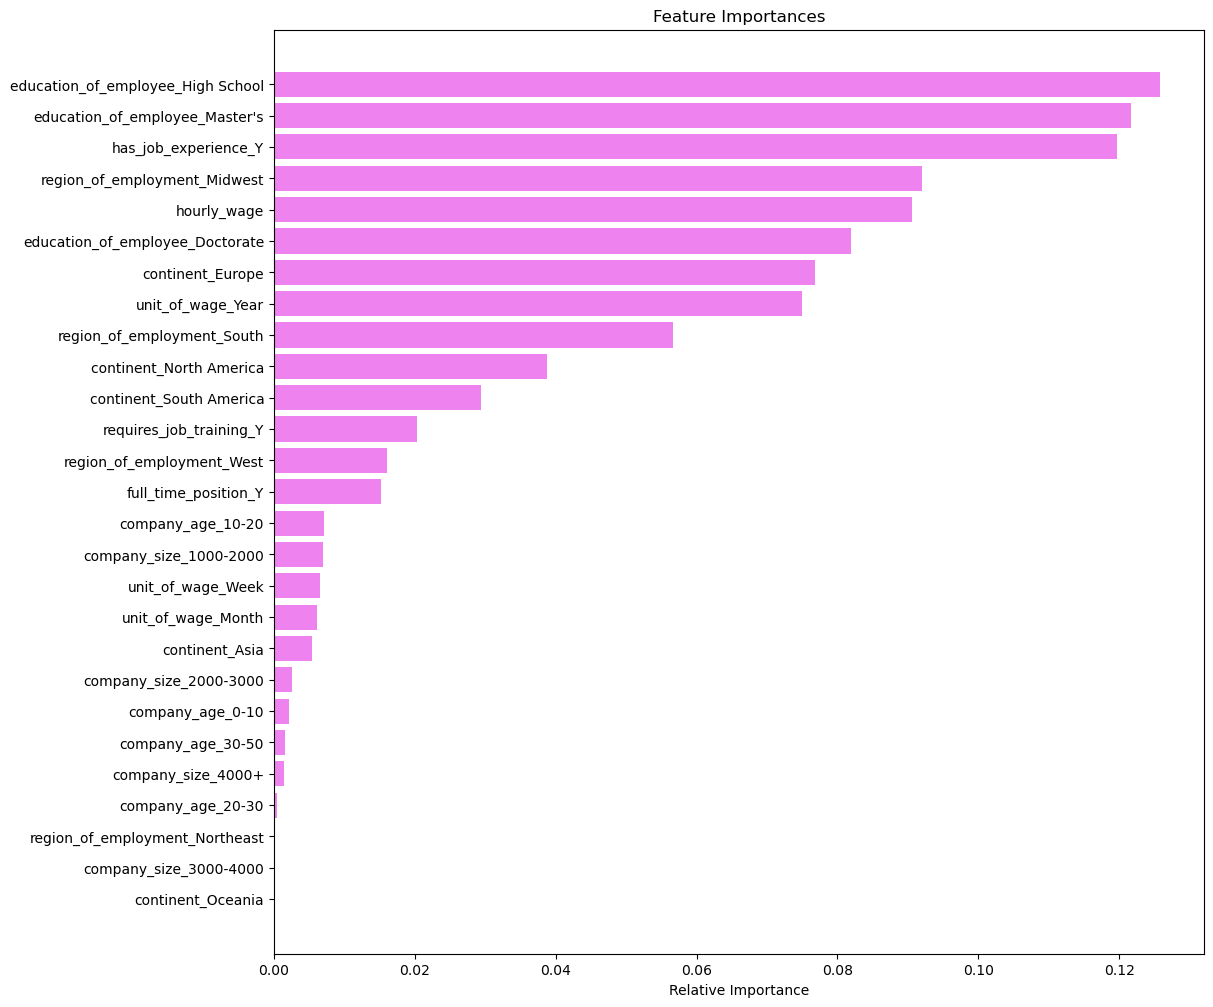

In [1742]:
feature_names = X_train.columns
importances = tuned_adb_og.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [1743]:
# The importance of features (table)

print(pd.DataFrame(tuned_adb_og.feature_importances_, columns = ["Importance"], 
                   index = X_train.columns).sort_values(by = 'Importance', ascending = False).head(10))

                                   Importance
education_of_employee_High School       0.126
education_of_employee_Master's          0.122
has_job_experience_Y                    0.120
region_of_employment_Midwest            0.092
hourly_wage                             0.091
education_of_employee_Doctorate         0.082
continent_Europe                        0.077
unit_of_wage_Year                       0.075
region_of_employment_South              0.057
continent_North America                 0.039


# Business Insights and Conclusions


- Please refer Business Report


***